In [2]:
import tensorflow as tf
import keras

In [37]:
#prepping the data
from keras.datasets import reuters
from keras.preprocessing import sequence
import keras
import keras.utils
from keras.utils.np_utils import to_categorical

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

#one hot encode labes
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

#train test
partial_x_train = input_train

partial_y_train = one_hot_train_labels

#train test
x_test = input_test

y_test = one_hot_test_labels

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)


In [40]:
#fitting the model
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 100))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(LSTM(32))
model.add(layers.Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=.2)

Epoch 1/20
57/57 [==============================] - 54s 870ms/step - loss: 2.8356 - acc: 0.3106 - val_loss: 2.2928 - val_acc: 0.3996
Epoch 2/20
57/57 [==============================] - 47s 823ms/step - loss: 2.1627 - acc: 0.4423 - val_loss: 1.9102 - val_acc: 0.4930
Epoch 3/20
57/57 [==============================] - 48s 840ms/step - loss: 1.8308 - acc: 0.5311 - val_loss: 2.1011 - val_acc: 0.4213
Epoch 4/20
57/57 [==============================] - 47s 824ms/step - loss: 1.6227 - acc: 0.5875 - val_loss: 1.8145 - val_acc: 0.5309
Epoch 5/20
57/57 [==============================] - 49s 860ms/step - loss: 1.4560 - acc: 0.6287 - val_loss: 1.7695 - val_acc: 0.5526
Epoch 6/20
57/57 [==============================] - 48s 838ms/step - loss: 1.3267 - acc: 0.6626 - val_loss: 1.8000 - val_acc: 0.5526
Epoch 7/20
57/57 [==============================] - 47s 827ms/step - loss: 1.2135 - acc: 0.6973 - val_loss: 1.7307 - val_acc: 0.5665
Epoch 8/20
57/57 [==============================] - 48s 843ms/step - 

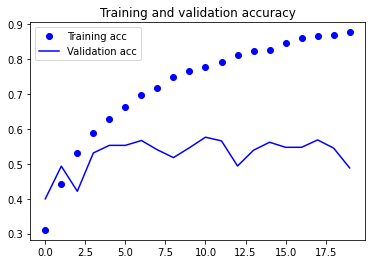

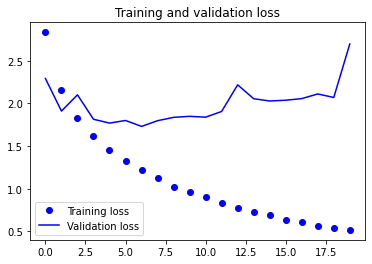

In [41]:
#accuracy vs. the number of epochs

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**After 7-10 epochs, the model started to overfit. Applying regularisation in the layers is my recommendation.**